In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
data = pd.read_csv("senators_sentiment.csv")
data

,name,group,gender,Democrat,female,Overall,Positive,Negative,Mixed,Neutral
0,Amy Klobuchar,Democrat,female,0.0,1.0,NEUTRAL,0.007546,0.119013,0.003111,0.870330
1,Ben Sasse,Republican,male,1.0,0.0,NEUTRAL,0.008877,0.077607,0.008827,0.904690
2,Benjamin L. Cardin,Democrat,male,0.0,0.0,NEUTRAL,0.007812,0.044993,0.000631,0.946564
3,Bill Cassidy,Republican,male,1.0,0.0,NEUTRAL,0.007056,0.089234,0.002419,0.901291
4,Brian Schatz,Democrat,male,0.0,0.0,NEUTRAL,0.011065,0.036437,0.001083,0.951415
...,...,...,...,...,...,...,...,...,...,...
93,Tim Scott,Republican,male,1.0,0.0,NEUTRAL,0.013689,0.028788,0.000437,0.957086
94,Tina Smith,Democrat,female,0.0,1.0,NEUTRAL,0.009505,0.068997,0.000334,0.921163
95,Todd Young,Republican,male,1.0,0.0,NEUTRAL,0.014667,0.048050,0.001154,0.936129
96,Tom Cotton,Republican,male,1.0,0.0,NEUTRAL,0.028129,0.099030,0.004028,0.868812


In [161]:
Dem = data[data['group'] == 'Democrat']
Dem1 = Dem[['name','Neutral']]
Dem1['Neutral'] = Dem1['Neutral'].apply(lambda x: round(x, 2))
Rep = data[data['group'] == 'Republican']
Rep1 = Rep[['name','Neutral']]
Rep1['Neutral'] = Rep1['Neutral'].apply(lambda x: round(x, 2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [162]:
Dem_median = [np.median(Dem1['Neutral'])]

In [163]:
Rep_median = [np.median(Rep1['Neutral'])]

In [181]:
fig, ax = plt.subplots()

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


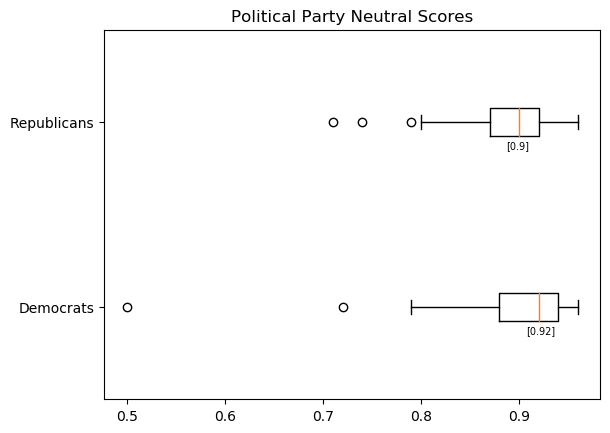

In [182]:
ax.boxplot(x=[Dem1['Neutral'], Rep1['Neutral']], vert=False)
ax.set_yticklabels(['Democrats', 'Republicans'])
ax.set_title('Political Party Neutral Scores')
ax.text(0.85, 0.2, Dem_median, transform=ax.transAxes, fontsize=7, va='top')
ax.text(0.81, 0.7, Rep_median, transform=ax.transAxes, fontsize=7, va='top')
plt.show()